In [23]:
import numpy as np
import pandas as pd 
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                  columns= iris['feature_names'] + ['target']).astype({'target': int}) \
       .assign(species=lambda x: x['target'].map(dict(enumerate(iris['target_names']))))
cols = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']

df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


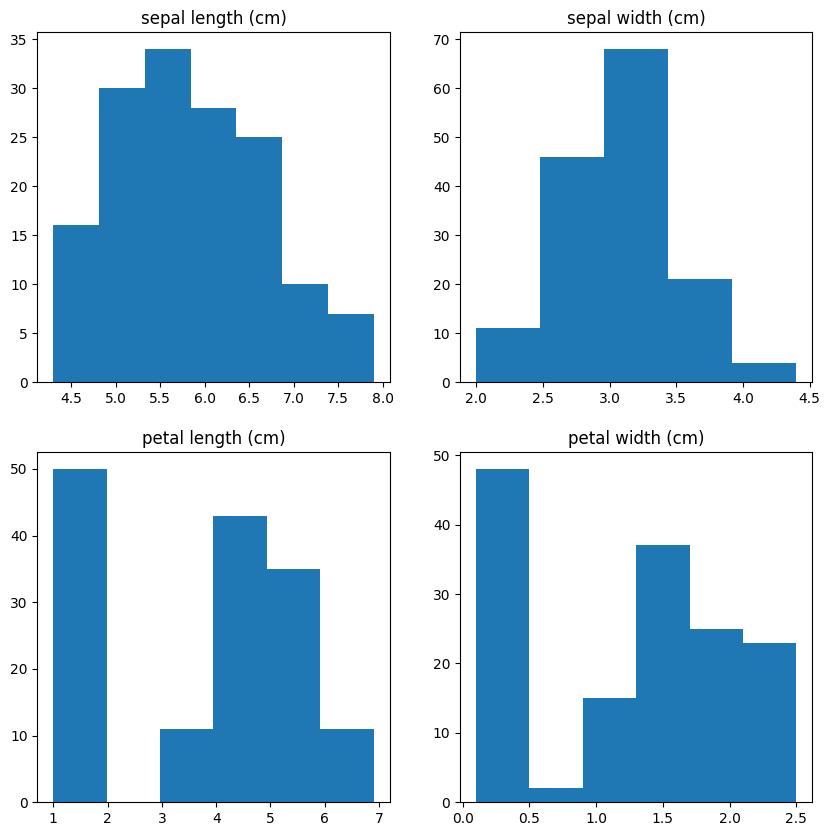

In [24]:
fig, ax = plt.subplots(2,2,figsize=(10,10))
ax[0,0].hist(df[cols[0]], bins=7)
ax[0,1].hist(df[cols[1]], bins=5)
ax[1,0].hist(df[cols[2]], bins=6)
ax[1,1].hist(df[cols[3]], bins=6)
ax[0,0].set_title(cols[0])
ax[0,1].set_title(cols[1])
ax[1,0].set_title(cols[2])
ax[1,1].set_title(cols[3])
plt.show()

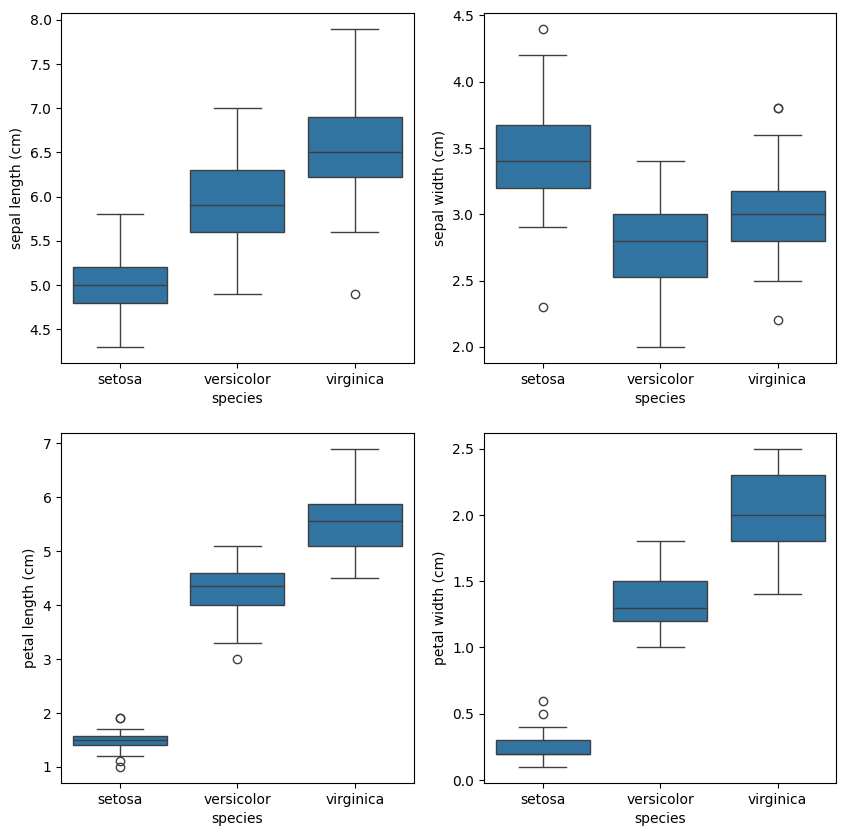

In [25]:
def graph(y):
    sns.boxplot(x="species", y=y, data=df)
plt.figure(figsize=(10,10))
     
plt.subplot(221)
graph(cols[0])
 
plt.subplot(222)
graph(cols[1])
 
plt.subplot(223)
graph(cols[2])
 
plt.subplot(224)
graph(cols[3])
 
plt.show()

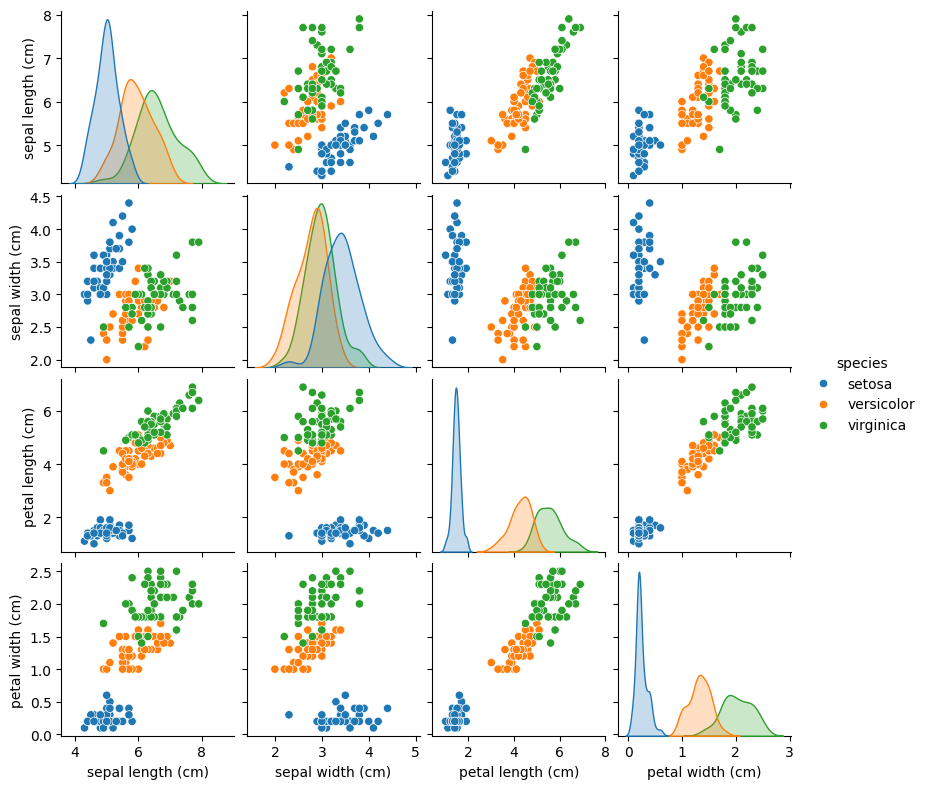

In [26]:
sns.pairplot(df.drop(['target'], axis = 1), hue='species', height=2)

In [27]:
#petal width (virginica and versicolor)
t1 = df[df['species'] == 'virginica']
t2 = df[df['species'] == 'versicolor']

t_group1_test = t1[cols[1]]
t_group2_test = t2[cols[1]]

t_stat, p_value = stats.ttest_ind(t_group1_test, t_group2_test)

print(f"t stat = {t_stat}")
print(f"p value = {p_value}")

t stat = 3.2057607502218186
p value = 0.0018191004238894803


In [28]:
#petal width (virginica and setosa)

u1 = df[df['species'] == 'virginica']
u2 = df[df['species'] == 'setosa']

u_group1_test = u1[cols[3]]
u_group2_test = u2[cols[3]]

u_stat, p_value = stats.mannwhitneyu(u_group1_test, u_group2_test)

print(f"u stat = {u_stat}")
print(f"p value = {p_value}")

u stat = 2500.0
p value = 2.4321931370649925e-18
